In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from utils.math_functions import generate_MullerBrown
import matplotlib.pyplot as plt

In [ ]:
def muller_brown_potential(x, y):
    U = np.zeros_like(x)
    for i in range(4):
        U += config.Aks[i] * np.exp(config.aks[i] * (x - config.X0s[i])**2 + config.bks[i] * (x - config.X0s[i]) * (y - config.Y0s[i]) + config.cks[i] * (y - config.Y0s[i])**2)
    return U

def muller_brown_gradient(x, y):
    grad = np.zeros((x.shape[0], x.shape[1], 2))
    for i in range(4):
        common = config.Aks[i] * np.exp(config.aks[i]*np.power(x-config.X0s[i],2) \
                 +config.bks[i]*(x-config.X0s[i])*(y-config.Y0s[i])
                + config.cks[i]*np.power(y - config.Y0s[i],2))
        assert (common.shape == x.shape)
        grad[:, :, 0] += common*(2.*config.aks[i]*(x-config.X0s[i]) + config.bks[i]*(y-config.Y0s[i]))
        grad[:, :, 1] += common*(2.*config.cks[i]*(y-config.Y0s[i]) + config.bks[i]*(x-config.X0s[i]))
    # grad.shape == (400, 400, 2)
    return grad

In [ ]:
%load_ext autoreload
%autoreload 2
from configs.RecursiveVPSDE.LSTM_fMullerBrown.recursive_LSTM_PostMeanScore_MullerBrown_T256_H05_tl_110data import get_config
config = get_config()
paths = generate_MullerBrown(config=config, H=config.hurst,S=10, T=config.ts_length, isUnitInterval=config.t0==1.)
paths = paths[:,:, :]
# Create grid
xmin = -1.
xmax = -0.9
ymin = 1.
ymax = 1.1
x = np.linspace(xmin, xmax, 400)
y = np.linspace(ymin, ymax, 400)
X, Y = np.meshgrid(x, y)
Z = muller_brown_potential(X, Y)
print("Zmin, Zmax", Z.min(), Z.max())
Z = Z  # log1p prevents log(0) issues
# Plot contours
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=200, cmap="coolwarm")
plt.colorbar(contour, label="Power-Law Transformed Potential Energy")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Power-Law Transformed Müller-Brown Potential Contour")
#paths = np.concatenate([np.repeat(np.array(config.initState)[np.newaxis, :], paths.shape[0], axis=0)[:, np.newaxis, :], paths], axis=1)
for i in range(paths.shape[0]):
    plt.plot(paths[i, :, 0], paths[i, :, 1], color='black', label='SDE Trajectory', linewidth=2)
    # Add points to indicate trajectory positions
    plt.scatter(paths[i, 0, 0], paths[i, 0, 1],  color="green", zorder=5)
    plt.scatter(paths[i, 1:, 0], paths[i, 1:, 1],  color="red", zorder=5, label='Trajectory Points')
plt.show()

In [ ]:
paths = generate_MullerBrown(config=config, H=config.hurst,S=10000, T=config.ts_length, isUnitInterval=config.t0==1.)

In [ ]:
paths.shape

In [ ]:
for k in range(1000):
    plt.plot(np.linspace(config.t0, config.t1+config.deltaT, config.ts_length), paths[np.random.choice(np.arange(paths.shape[0]), size=1)[0],:, 0])
plt.show()
plt.close()
for k in range(1000):
    plt.plot(np.linspace(config.t0, config.t1+config.deltaT, config.ts_length), paths[np.random.choice(np.arange(paths.shape[0]), size=1)[0],:, 1])

In [ ]:
plt.hist(paths[:, :,0].flatten(), bins=150)
print(np.quantile(paths[:,:, 0].flatten(), 0.1), np.quantile(paths[:,:, 0].flatten(), 0.9))
plt.show()
plt.close()
plt.hist(paths[:, :, 1].flatten(), bins=150)
print(np.quantile(paths[:,:, 1].flatten(), 0.1), np.quantile(paths[:,:, 1].flatten(), 0.9))
plt.show()
plt.close()

In [ ]:
paths

In [ ]:
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config

In [ ]:
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))

In [ ]:
paths.shape

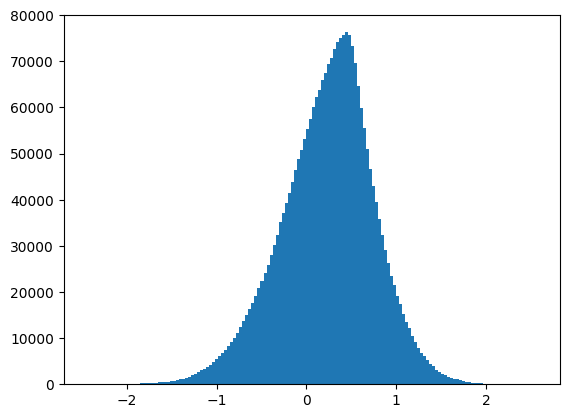

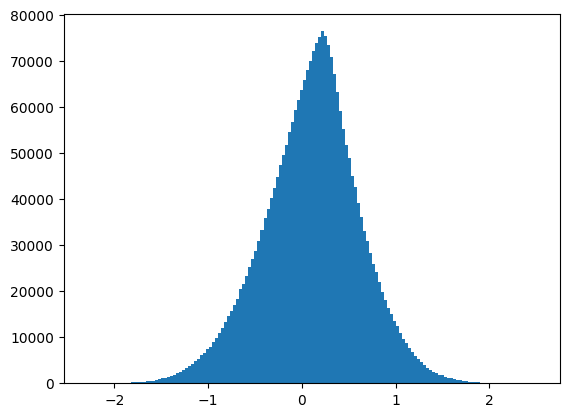

In [24]:
for i in range(config.ndims):
    plt.hist(paths[:, :, i].flatten(), bins=150, label=f"Dim {i}")
    plt.show()
    plt.close()

In [25]:
np.save(config.data_path, paths)

In [26]:
config.data_path

'/Users/marcos/GitHubRepos/FractionalBrownianMotion/data/20DLnz_samples_t00_dT3906e-03_T256_075FConst_10Diff.npy'

In [27]:
from configs.RecursiveVPSDE.Markovian_40DLorenz.recursive_Markovian_PostMeanScore_40DLorenz_Stable_T256_H05_tl_110data_StbleTgt import get_config
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))
np.save(config.data_path, paths)

In [28]:
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))
np.save(config.data_path, paths)

In [29]:
from configs.RecursiveVPSDE.Markovian_12DLorenz.recursive_Markovian_PostMeanScore_12DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))
np.save(config.data_path, paths)

In [18]:
import numpy as np
import pickle
with np.load("/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/TSPM_Markovian/20DLnzChaosLessData/TSPM_MLP_ST_1000FTh_NSTgtNFMReg_20DLnz_DriftEvalExp_5Nep_tl110data_00t0_3906e-03dT_1NDT_2LFac_BetaMax20e+01_125FConst_MSE.npy.npz", allow_pickle=True) as z:
    d = {k: z[k] for k in z.files}

ModuleNotFoundError: No module named 'numpy._core'

In [30]:
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))
np.save(config.data_path, paths)

In [31]:
from configs.RecursiveVPSDE.Markovian_40DLorenz.recursive_Markovian_PostMeanScore_40DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config
from utils.math_functions import generate_Lorenz96
config = get_config()
paths = generate_Lorenz96(config=config, H=config.hurst,S=10240, T=config.ts_length, isUnitInterval=config.t1==1., diff=config.diffusion,ndims=config.ndims, forcing_const=config.forcing_const, initial_state=np.array(config.initState))
np.save(config.data_path, paths)